### Credit Card Transactions Fraud Detection Dataset 
##### https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize Spark session
spark = SparkSession.builder.appName("Fraud Detection").getOrCreate()

In [3]:
# Read the CSV file
df = spark.read.csv('fraudTrain.csv', header=True, inferSchema=True)

In [4]:
# Show the first 5 rows
df.show(5)

+---+---------------------+----------------+--------------------+-------------+------+---------+-------+------+--------------------+--------------+-----+-----+-------+---------+--------+--------------------+----------+--------------------+----------+------------------+-----------+--------+
|_c0|trans_date_trans_time|          cc_num|            merchant|     category|   amt|    first|   last|gender|              street|          city|state|  zip|    lat|     long|city_pop|                 job|       dob|           trans_num| unix_time|         merch_lat| merch_long|is_fraud|
+---+---------------------+----------------+--------------------+-------------+------+---------+-------+------+--------------------+--------------+-----+-----+-------+---------+--------+--------------------+----------+--------------------+----------+------------------+-----------+--------+
|  0|  2019-01-01 00:00:18|2703186189652095|fraud_Rippin, Kub...|     misc_net|  4.97| Jennifer|  Banks|     F|      561 Perry 

In [5]:
# Show the first 5 rows as a Pandas DataFrame
print(df.limit(5).toPandas())

   _c0 trans_date_trans_time            cc_num  \
0    0   2019-01-01 00:00:18  2703186189652095   
1    1   2019-01-01 00:00:44      630423337322   
2    2   2019-01-01 00:00:51    38859492057661   
3    3   2019-01-01 00:01:16  3534093764340240   
4    4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      

In [6]:
# Get the number of rows
num_rows = df.count()
print(f"Number of rows: {num_rows}")

# Get the number of columns
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")


Number of rows: 1296675
Number of columns: 23


In [7]:
# Check schema of the dataframe
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- trans_date_trans_time: timestamp (nullable = true)
 |-- cc_num: long (nullable = true)
 |-- merchant: string (nullable = true)
 |-- category: string (nullable = true)
 |-- amt: double (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- city_pop: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- trans_num: string (nullable = true)
 |-- unix_time: integer (nullable = true)
 |-- merch_lat: double (nullable = true)
 |-- merch_long: double (nullable = true)
 |-- is_fraud: integer (nullable = true)



In [8]:
# Count null values for each column
null_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
# Show the result
null_counts.show()

+---+---------------------+------+--------+--------+---+-----+----+------+------+----+-----+---+---+----+--------+---+---+---------+---------+---------+----------+--------+
|_c0|trans_date_trans_time|cc_num|merchant|category|amt|first|last|gender|street|city|state|zip|lat|long|city_pop|job|dob|trans_num|unix_time|merch_lat|merch_long|is_fraud|
+---+---------------------+------+--------+--------+---+-----+----+------+------+----+-----+---+---+----+--------+---+---+---------+---------+---------+----------+--------+
|  0|                    0|     0|       0|       0|  0|    0|   0|     0|     0|   0|    0|  0|  0|   0|       0|  0|  0|        0|        0|        0|         0|       0|
+---+---------------------+------+--------+--------+---+-----+----+------+------+----+-----+---+---+----+--------+---+---+---------+---------+---------+----------+--------+



In [9]:
print(null_counts.limit(1).toPandas())

   _c0  trans_date_trans_time  cc_num  merchant  category  amt  first  last  \
0    0                      0       0         0         0    0      0     0   

   gender  street  ...  lat  long  city_pop  job  dob  trans_num  unix_time  \
0       0       0  ...    0     0         0    0    0          0          0   

   merch_lat  merch_long  is_fraud  
0          0           0         0  

[1 rows x 23 columns]


In [10]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- trans_date_trans_time: timestamp (nullable = true)
 |-- cc_num: long (nullable = true)
 |-- merchant: string (nullable = true)
 |-- category: string (nullable = true)
 |-- amt: double (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- city_pop: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- trans_num: string (nullable = true)
 |-- unix_time: integer (nullable = true)
 |-- merch_lat: double (nullable = true)
 |-- merch_long: double (nullable = true)
 |-- is_fraud: integer (nullable = true)



In [11]:
# Descriptive statistics
df.describe().show()

+-------+-----------------+--------------------+-------------------+-------------+-----------------+-------+-------+-------+--------------------+-------+-------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+------------------+------------------+--------------------+
|summary|              _c0|              cc_num|           merchant|     category|              amt|  first|   last| gender|              street|   city|  state|              zip|              lat|              long|         city_pop|               job|           trans_num|           unix_time|         merch_lat|        merch_long|            is_fraud|
+-------+-----------------+--------------------+-------------------+-------------+-----------------+-------+-------+-------+--------------------+-------+-------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+----------------

In [12]:
print(df.describe().toPandas())

  summary                _c0                 cc_num             merchant  \
0   count            1296675                1296675              1296675   
1    mean           648337.0  4.1719204207972077E17                 None   
2  stddev  374317.9744882685  1.3088064470002432E18                 None   
3     min                  0            60416207185  fraud_Abbott-Rogahn   
4     max            1296674    4992346398065154184     fraud_Zulauf LLC   

        category                amt    first     last   gender  \
0        1296675            1296675  1296675  1296675  1296675   
1           None  70.35103545607046     None     None     None   
2           None  160.3160385715277     None     None     None   
3  entertainment                1.0    Aaron   Abbott        F   
4         travel            28948.9  Zachary   Zuniga        M   

                       street  ...                zip                lat  \
0                     1296675  ...            1296675            12966

In [13]:
# Unique values count for categorical columns
categorical_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col_name in categorical_cols:
    unique_count = df.select(col_name).distinct().count()
    print(f"Unique count for {col_name}: {unique_count}")

Unique count for merchant: 693
Unique count for category: 14
Unique count for gender: 2
Unique count for state: 51
Unique count for job: 494


In [14]:
# Aggregation by gender
gender_counts = df.groupBy('gender').count().toPandas()
gender_counts

,gender,count
0,F,709863
1,M,586812


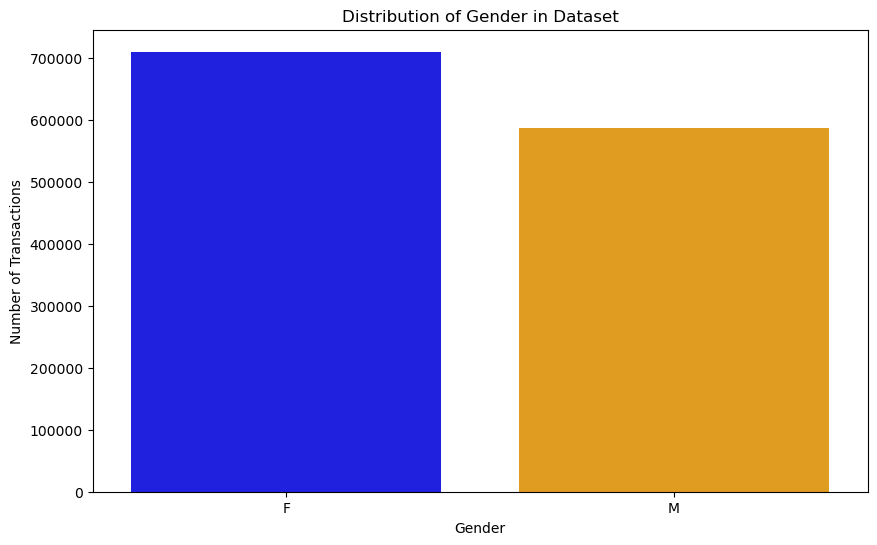

In [15]:
# Plot gender distribution
plt.figure(figsize=(10,6))
sns.barplot(x='gender', y='count', data=gender_counts, palette=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Gender in Dataset')
plt.show()

In [16]:
# Aggregation by state and transaction amount
state_amt = df.groupBy('state').agg(spark_sum('amt').alias('total_amt')).orderBy('total_amt', ascending=False).toPandas()
state_amt

,state,total_amt
0,TX,6800917.53
1,NY,6006499.03
2,PA,5771009.53
3,CA,4138078.51
4,OH,3396146.66
5,MI,3282724.96
6,FL,3155191.63
7,IL,3011891.30
8,AL,2682717.10
9,MO,2637453.06


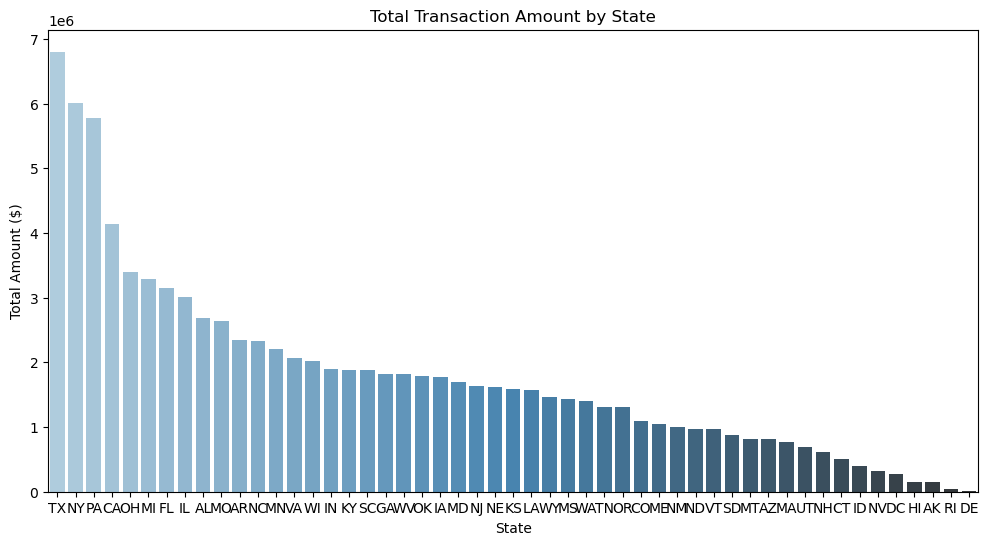

In [17]:
# Plot total transaction amount by state
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='total_amt', data=state_amt, palette='Blues_d')
plt.xlabel('State')
plt.ylabel('Total Amount ($)')
plt.title('Total Transaction Amount by State')
plt.show()

In [18]:
# Maximum and minimum transaction amount by state
max_state_row = state_amt.iloc[0]
min_state_row = state_amt.iloc[-1]
print(f"The state with the maximum total amount is {max_state_row['state']} with ${max_state_row['total_amt']:.2f}")
print(f"The state with the minimum total amount is {min_state_row['state']} with ${min_state_row['total_amt']:.2f}")

The state with the maximum total amount is TX with $6800917.53
The state with the minimum total amount is DE with $4630.44


In [19]:
# Aggregation by category
category_amt = df.groupBy('category').agg(spark_sum('amt').alias('total_amt')).orderBy('total_amt', ascending=False).toPandas()
category_amt

,category,total_amt
0,grocery_pos,14460822.38
1,shopping_pos,9307993.61
2,shopping_net,8625149.68
3,gas_transport,8351732.29
4,home,7173928.11
5,kids_pets,6503680.16
6,entertainment,6036678.56
7,misc_net,5117709.26
8,misc_pos,5009582.50
9,food_dining,4672459.44


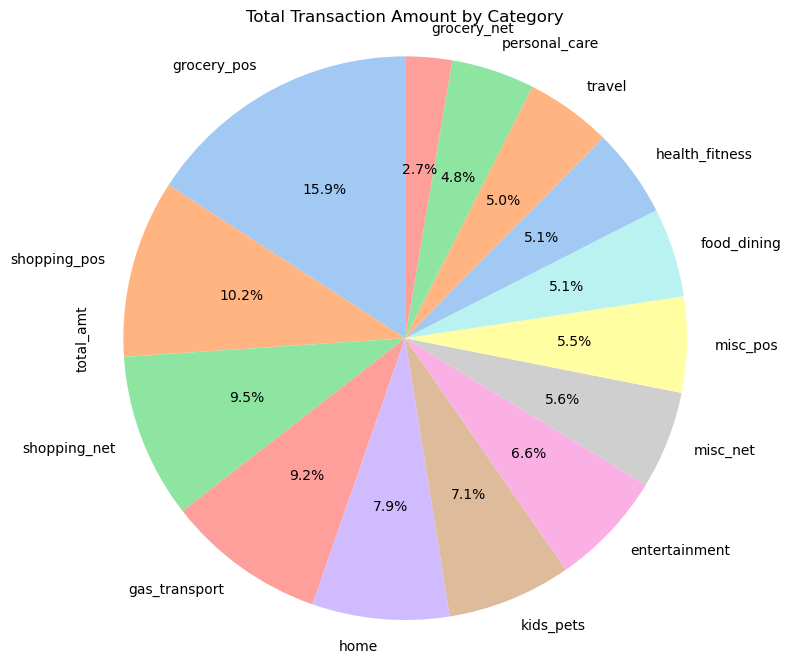

In [20]:
# Plot transaction amount by category
plt.figure(figsize=(8,8))
category_amt.set_index('category')['total_amt'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Total Transaction Amount by Category')
plt.axis('equal')
plt.show()

In [21]:
# Maximum and minimum transaction amount by category
max_category_row = category_amt.iloc[0]
min_category_row = category_amt.iloc[-1]
print(f"The category with the maximum total amount is {max_category_row['category']} with ${max_category_row['total_amt']:.2f}")
print(f"The category with the minimum total amount is {min_category_row['category']} with ${min_category_row['total_amt']:.2f}")

The category with the maximum total amount is grocery_pos with $14460822.38
The category with the minimum total amount is grocery_net with $2439412.68


In [22]:
# Aggregation by year
df = df.withColumn('year', col('trans_date_trans_time').substr(1, 4))  # Extract year directly from the original column
year_amt = df.groupBy('year').agg(spark_sum('amt').alias('total_amt')).orderBy('total_amt', ascending=False).toPandas()

In [23]:
year_amt

,year,total_amt
0,2019,64984952.93
1,2020,26237475.97


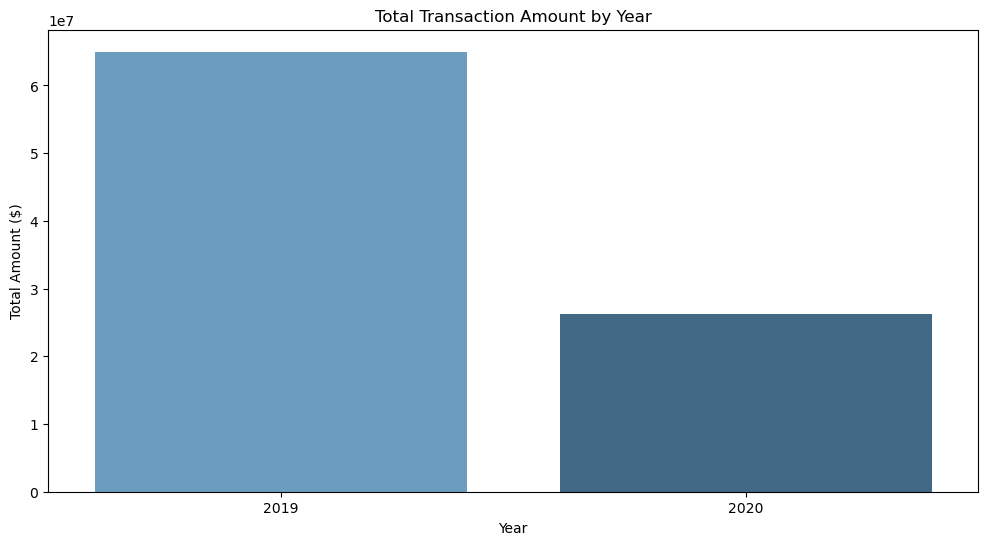

In [24]:
# Plot total transaction amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='total_amt', data=year_amt, palette='Blues_d')
plt.xlabel('Year')
plt.ylabel('Total Amount ($)')
plt.title('Total Transaction Amount by Year')
plt.show()

In [25]:
# Filter data for years 2019 and 2020, group by year and gender
filtered_df = df.filter(df['year'].isin(['2019', '2020']))
gender_year_counts = filtered_df.groupBy('year', 'gender').count().toPandas().pivot(index='year', columns='gender', values='count').fillna(0)
gender_year_counts

gender,F,M
year,,
2019,506117,418733
2020,203746,168079


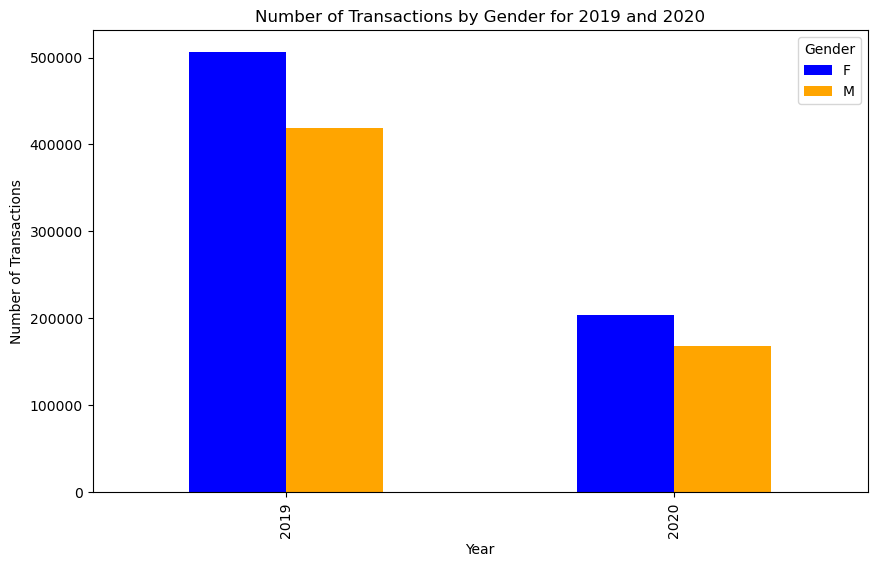

In [26]:
# Plot the number of transactions by gender for 2019 and 2020
gender_year_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Gender for 2019 and 2020')
plt.legend(title='Gender')
plt.show()